# Probability practice

## Part A

So far we know that:
* P(RC) = 0.3 (expected fraction of random clickers)
* P(Y|RC) = 0.5 (random clickers choose "Yes" with equal probability)
* P(N|RC) = 0.5 (random clickers choose "No" with equal probability)
* P(Y) = 0.65 (65% said "Yes")
* P(N) = 0.35 (35% said "No")

And we are trying to find:
* P(Y|TC) = ? (probability that a truthful clicker answers "Yes")
* P(N|TC) = ? (probability that a truthful clicker answers "No")

If we use the rule of total probability we get the following equation and can substitute the values: 
    
    P(Y) = P(Y|RC) * P(RC) + P(Y|TC) * P(TC)
    0.65 = 0.5 * 0.3 + P(Y|TC) * P(TC)
    0.65 = 0.15 + P(Y|TC) * P(TC)

Now to solve for P(Y|TC) * P(TC) we can use the fact that P(Y) + P(N) = 1 or P(Y) = 1 - P(N) (sum of probabilities is 1):
    
    0.65 = 1 - 0.35
    0.65 = 0.15 + P(Y|TC) * P(TC)
    P(Y|TC) * P(TC) = 0.65 - 0.15 
    P(Y|TC) * P(TC) = 0.5

P(Y|TC) * P(TC) is the probability that a truthful clicker answers "Yes", so:

P(Y|TC) = 0.5 / P(TC)
To find the fraction of truthful clickers (P(TC)) we can use the fact that RC + TC = 1 (sum of probabilities is 1):

P(RC) + P(TC) = 1
0.3 + P(TC) = 1
P(TC) = 0.7 
So, using this:

P(Y|TC) = 0.5 / 0.7
P(Y|TC) is approximately 0.7143
About 71.43% of people are truthful clickers that answered "Yes"

# Part B

so far we know that:

Sensitivity (P(+|YD)) = 0.993 (probability of testing positive given that the person has the disease)
Specificity (P(-|ND)) = 0.9999 (probability of testing negative given that the person does not have the disease)
Incidence of the disease (P(YD)) = 0.000025 (probability that a person has the disease)
Incidence of not having the disease (P(ND)) = 0.999975. (probability that a person does not have the disease)
P(YD|+) = ? (we want to find the probability that a person has the disease given that they tested positive)

If we use Bayes theorem to solve it, we can start with this equation:

P(YD|+) = (P(+|YD) * P(YD)) / P(+)
We can find P(+) using the rule of total probability:

P(+) = P(+|YD) * P(YD) + P(+|ND) * P(ND)
    
We know that P(+|ND) + specificity = 1 because if someone does not have the disease, they would test positive with the complement of the probability that they test negative:

P(+|ND) = 1 - 0.9999 = 0.0001
Returning to the equation for P(+):

P(+) = (0.993 * 0.000025) + (0.0001 * 0.999975)
P(+) = 0.100022325
Returning to Bayes theorem:

P(YD|+) = (P(+|YD) * P(YD)) / P(+)
P(YD|+) = (0.993 * 0.000025) / 0.100022325
P(YD|+) is approximately 0.002483
The probability that you would test positive and have the disease is about .248%

# Wrangling the Billboard Top 100

## Part A

In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("/Users/luisvillazon/Dropbox/UT Austin/Summer/Introduction to Machine Learning/Data")

df=pd.read_csv("billboard.csv")

df.head(5)

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [58]:
#Table of the top 10 most popular songs since 1958 (by the total number of weeks that a song spent on the Top 100).

# Grouping by 'performer' and 'song' and counting the number of weeks
top_10_songs = df.groupby(['performer', 'song']).size().sort_values(ascending=False).head(10).reset_index(name='count')

# Printing the top 3 rows from the resulting DataFrame
print(top_10_songs.head(10))


                                   performer  \
0                            Imagine Dragons   
1                                 AWOLNATION   
2                                 The Weeknd   
3                                 Jason Mraz   
4                                LeAnn Rimes   
5                                OneRepublic   
6  LMFAO Featuring Lauren Bennett & GoonRock   
7                                      Jewel   
8                                      Adele   
9                           Carrie Underwood   

                                  song  count  
0                          Radioactive     87  
1                                 Sail     79  
2                      Blinding Lights     76  
3                            I'm Yours     76  
4                        How Do I Live     69  
5                       Counting Stars     68  
6                    Party Rock Anthem     68  
7  Foolish Games/You Were Meant For Me     65  
8                  Rolling In The Deep 

The table displays the top 10 songs with their respective artists, ranked by the frequency of their appearances in the dataset. This offers a snapshot of the most recurrent song and artist combinations, suggesting their prominence or popularity during the timeframe considered.

# Part B

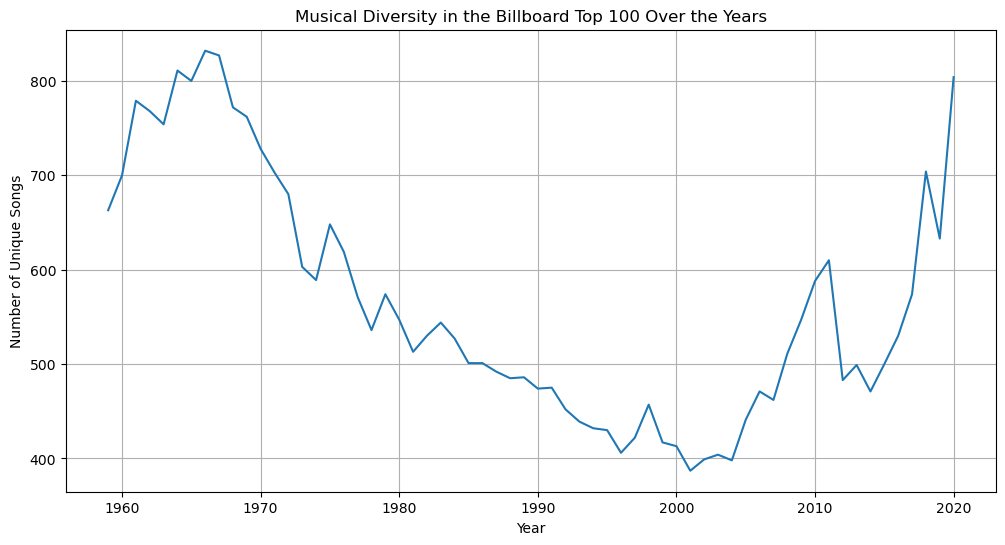

In [59]:
# musical diversity over the years (number of unique songs that appeared in the Top 100 that year) - Line graph

# Step 1: Filter the dataframe
filtered_df = df[(df['year'] != 1958) & (df['year'] != 2021)]

# Step 2 & 3: Group by 'year' and then by 'song' & 'performer' and count unique songs
unique_songs_per_year = (filtered_df.groupby('year')
                         .apply(lambda x: x.drop_duplicates(subset=['song', 'performer']))
                         .reset_index(drop=True)  # Reset the index to prevent the ambiguity
                         .groupby('year').size())

# Step 4: Plot the results
plt.figure(figsize=(12, 6))
unique_songs_per_year.plot(kind='line')
plt.title('Musical Diversity in the Billboard Top 100 Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid(True)
plt.show()



This bar chart showcases the elite artists who, since 1958, have had at least 30 songs staying in the Billboard Top 100 for ten weeks or more. It provides a clear representation of those with remarkable longevity and consistent chart performance in the U.S. music scene.

## Part C

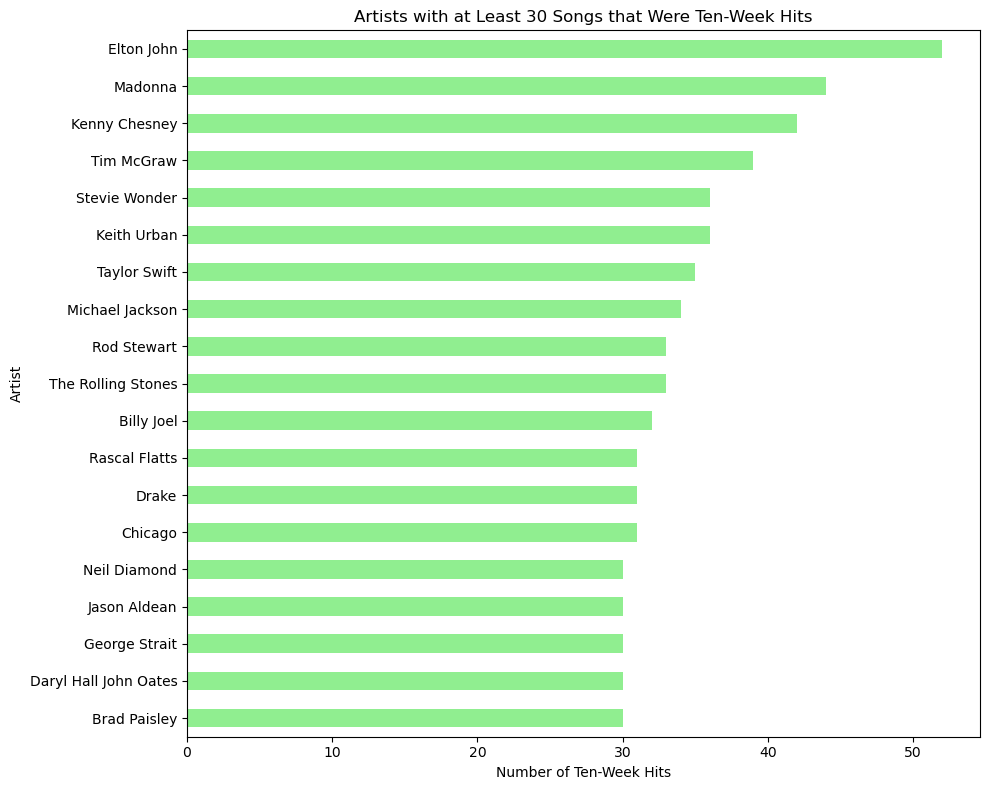

In [60]:
#Artists with at Least 30 Songs that Were Ten-Week Hits

# 1. Determine Ten-week Hits
ten_week_hit_songs = df[df['weeks_on_chart'] >= 10]['song_id'].unique()

# 2. Count Ten-week Hits for Each Artist
ten_week_hits_df = df[df['song_id'].isin(ten_week_hit_songs)]
artist_counts = ten_week_hits_df.groupby('performer')['song_id'].nunique()

# 3. Filter Out Artists
top_artists = artist_counts[artist_counts >= 30]

# 4. Create the Bar Plot
top_artists.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), color='lightgreen')
plt.title('Artists with at Least 30 Songs that Were Ten-Week Hits')
plt.ylabel('Artist')
plt.xlabel('Number of Ten-Week Hits')
plt.tight_layout()
plt.show()


The bar chart visualizes the top musical artists since 1958 who have produced an impressive number of hits, each charting for at least ten weeks on the Billboard Top 100. These elite artists, numbering only 19, highlight consistent performance and significant impact on the U.S. music industry.

# Visual story telling part 1: green buildings

In [61]:
# Load the dataset
data = pd.read_csv('greenbuildings.csv')
data.head(5)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


Analyzing the variables:

To guage the influence of confounding variables in this analysis, we can begin by using a correlation heatmap to detect any correlations between variables, particularly for rent and green_rating, that might be influencing the result previously achieved.

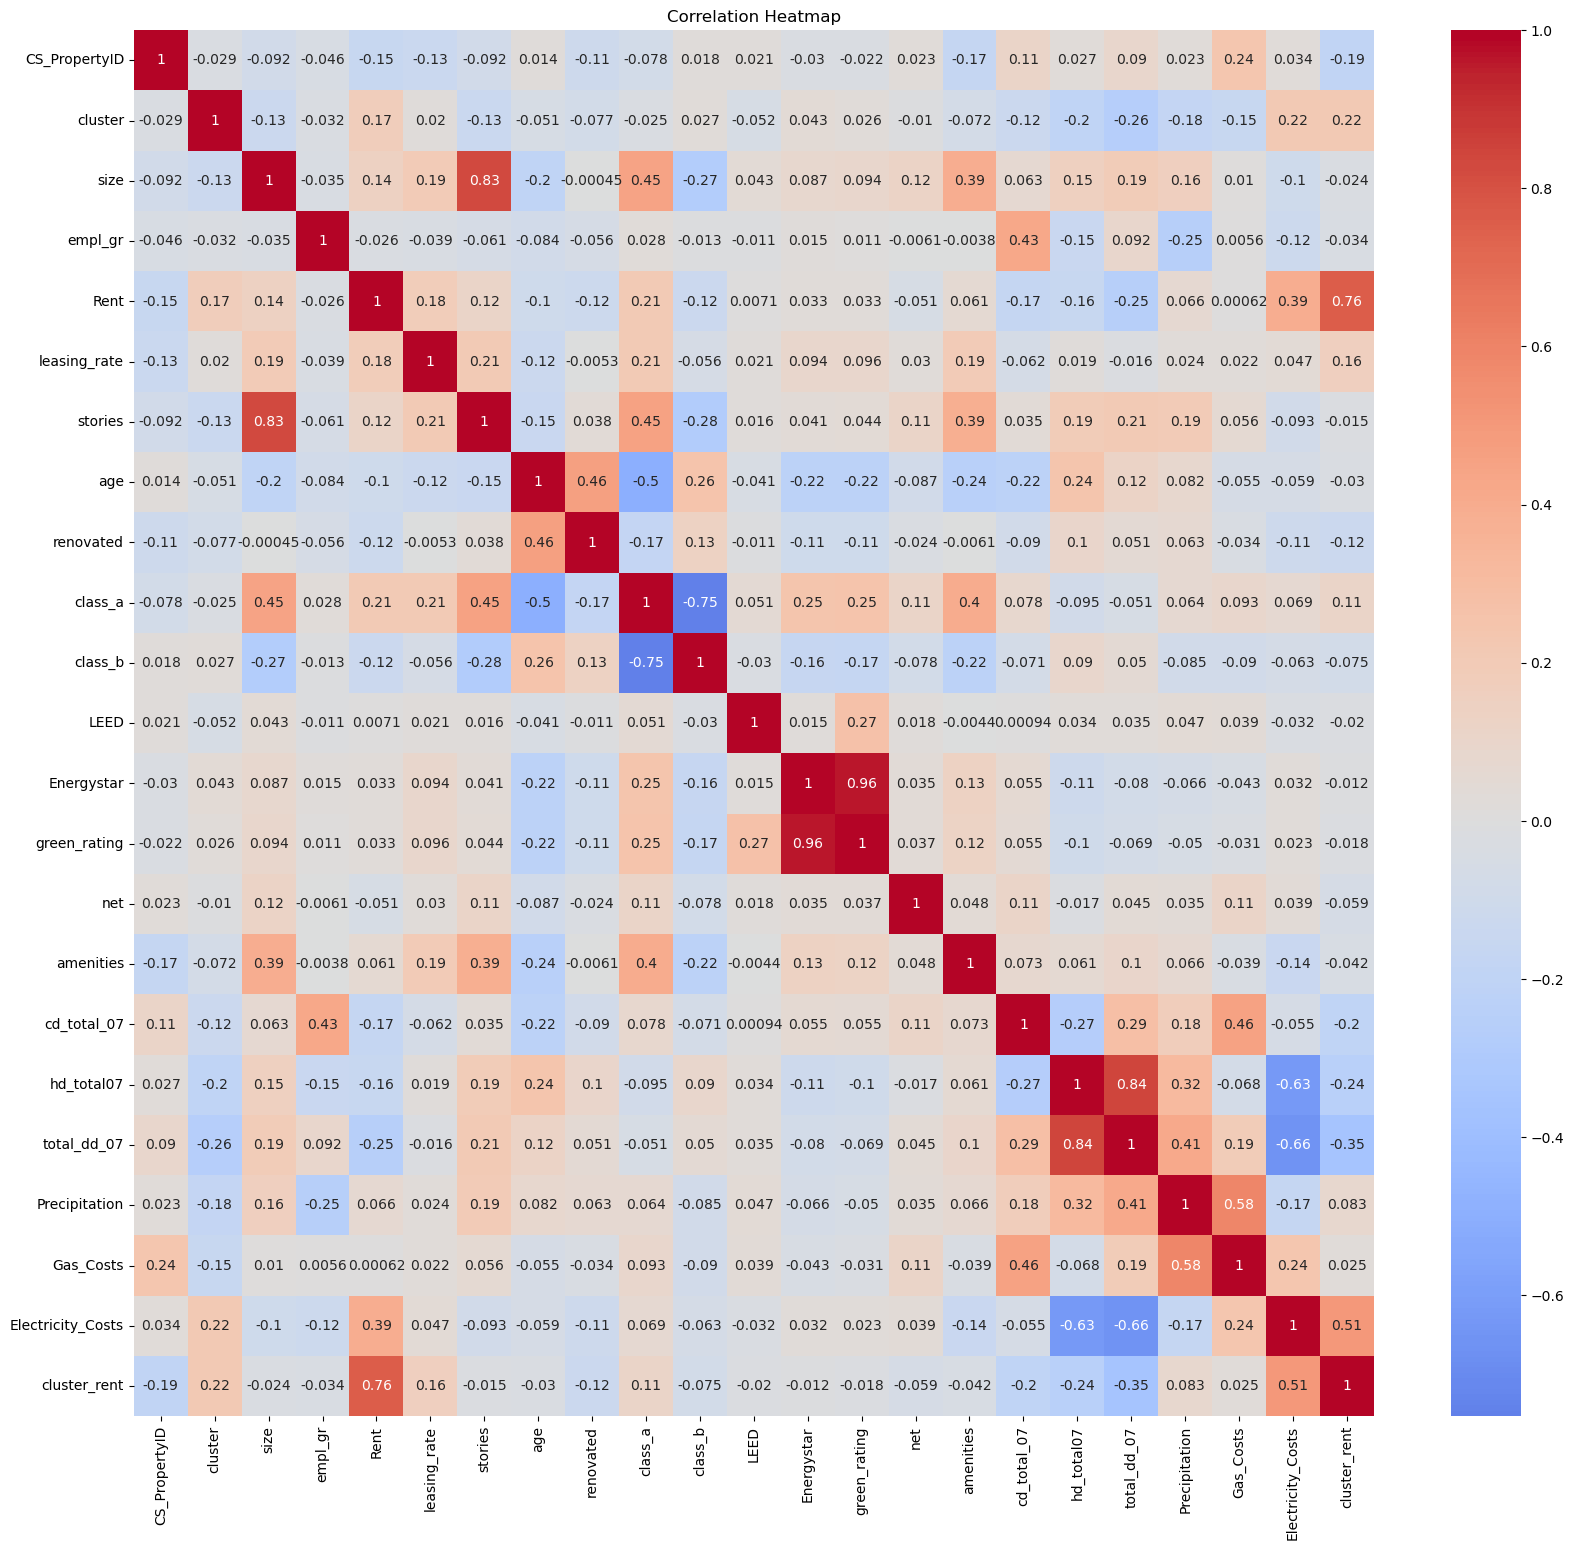

In [62]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


Here are a few noteworthy relations regarding rent and green_rating:
* the cluster rent strongly correlates positively to the rent of that building
* Rent is positively correlated to class_a buildings but negatively correlated to class_b buildings 
* green_rating is positively correlated to class_a buildings but negatively correlated to class_b buildings
* Rent is negatively correlated to age and renovation 
* green_rating is negatively correlated to age and renovation 
* Rent negatively correlates to cooling/heating degree days 
* Rent positevly correlates to building stories, leasing rate, and size
* Green_rating positively correlates to amenities, Energystar, and LEED ratings

Some basic inerpretations made from this analysis: 
* Some of these relations are expected such as rent with building story, size, cluster rent, leasing rate because a higher rent should indicate higher values for all of them as well.
* Similarly, green_rating is expected to be strongly correlated to the LEED, Energystar, and amenities in a building as a positive value for any of these will give the building a positive green rating and having more amenities typically comes with the qualifications for these rating systems

However, some correlations that are present in both rent and green_rating may indicate the influence of confounding variables:
* Class A buildings are likely higher rent
* Class B buildings are more likely to be not green rated and have lower rent 
* Green rated buildings are typically new, so if a building is old or renovated they are more likely to be not green rated
* Rent tends to decrease for buildings that are older and renovated 

*Could the fact that class A buidings tend to have higher rents and are more often classified as green buildings, and class B buildings which tend to have lower rent values and are more often classified as not green buildings affect how the worker came to his conclusion and be distorting the relationship between rent and green rating?*

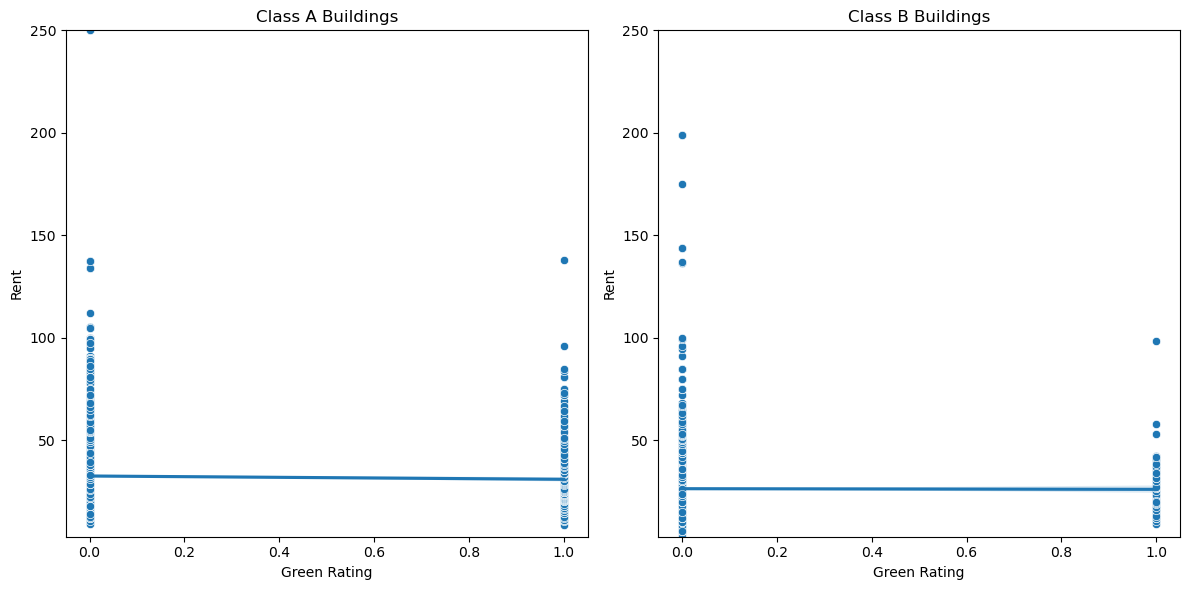

In [63]:
# Create subplots for each class
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Class A buildings
sns.scatterplot(data=data[data['class_a'] == 1], x='green_rating', y='Rent', ax=axes[0])
sns.regplot(data=data[data['class_a'] == 1], x='green_rating', y='Rent', scatter=False, ax=axes[0])
axes[0].set_title('Class A Buildings')
axes[0].set_xlabel('Green Rating')
axes[0].set_ylabel('Rent')
axes[0].set_ylim(data['Rent'].min(), data['Rent'].max())  # Set y-axis limits

# Scatter plot for Class B buildings
sns.scatterplot(data=data[data['class_b'] == 1], x='green_rating', y='Rent', ax=axes[1])
sns.regplot(data=data[data['class_b'] == 1], x='green_rating', y='Rent', scatter=False, ax=axes[1])
axes[1].set_title('Class B Buildings')
axes[1].set_xlabel('Green Rating')
axes[1].set_ylabel('Rent')
axes[1].set_ylim(data['Rent'].min(), data['Rent'].max())  # Set y-axis limits

plt.tight_layout()
plt.show()


Looking at these scatterplots of the Rent and green rating for class A and class B buildings, we can see that there is clearly a distinct pattern and difference in relation between Rent and green_rating between classes (they are confounding variables). It seems for class A buildings, there are more green ratings for higher rent buildings compared to class B buildings of similar rental price, indicating that a green rated building does not necessarily indicate a higher rental price.

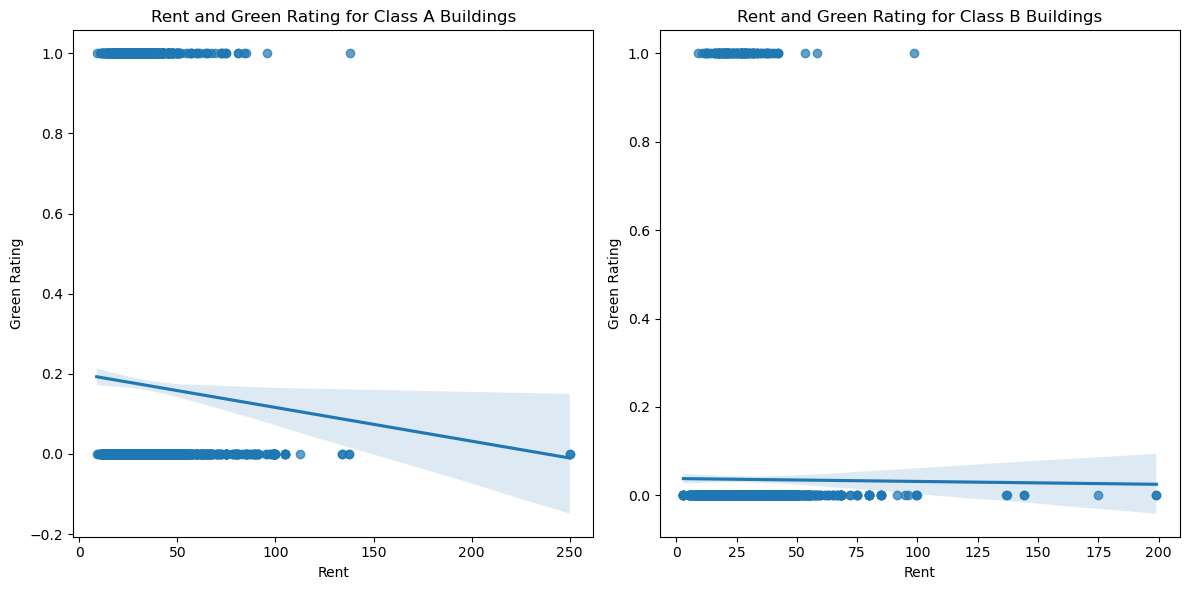

In [64]:
# Create two separate scatter plots for Class A and Class B buildings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Class A buildings
sns.regplot(data=data[data['class_a'] == 1], x='Rent', y='green_rating', scatter_kws={'alpha': 0.7}, ax=axes[0])
axes[0].set_title('Rent and Green Rating for Class A Buildings')
axes[0].set_xlabel('Rent')
axes[0].set_ylabel('Green Rating')

# Scatter plot for Class B buildings
sns.regplot(data=data[data['class_b'] == 1], x='Rent', y='green_rating', scatter_kws={'alpha': 0.7}, ax=axes[1])
axes[1].set_title('Rent and Green Rating for Class B Buildings')
axes[1].set_xlabel('Rent')
axes[1].set_ylabel('Green Rating')

plt.tight_layout()
plt.show()


Looking at these charts, we can acutally see that as rent increases, the likelihood that they are green actually decreases for class A buildings. For class B buildings, it seems like rent does not really factor into how green the building is and most class B buildings are not green. We can now adjust our results based on these findings, and say if it is a class A building, Higher rent buildings are actually less likely to be green and for class B buildings, the green rating is almost negligible in determining rent for buildings. 

*Conclusion*

To readdress the conclusion reached by the on-staff stats guru, although his analysis was a good start, it was clearly affected by the confounding presence of the class A and B variables. To get a more accurate number, his conclusion could be improved by using a model that controls for class A and class B buildings, giving a more accurate coefficient for the shift in rental price with green rating. 

# Visual story telling part 2: Capital Metro data

In [65]:
# Loading the dataset
import pandas as pd
df = pd.read_csv('capmetro_UT.csv')
df.head(5)

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


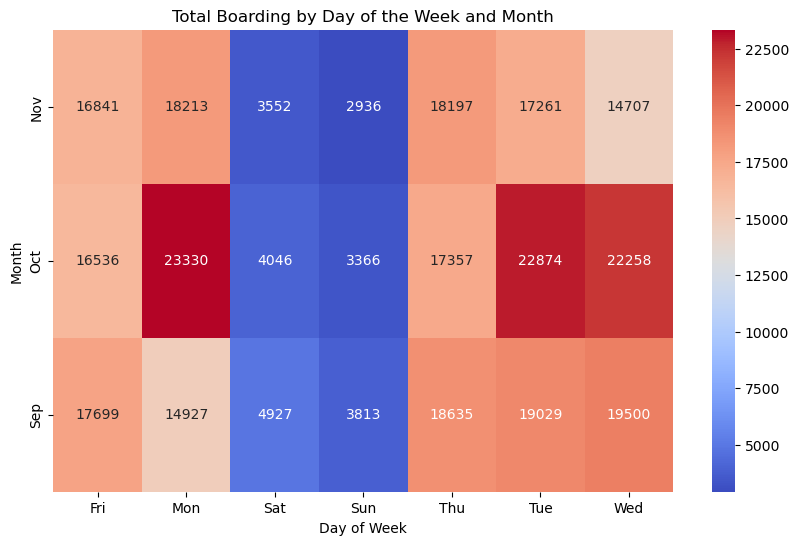

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

##Visualizing ridership patterns between variables : 'month', 'day_of_week' and 'boarding'

# Pivoting the dataframe df to create a matrix for heatmap
pivot_df = df.pivot_table(index='month', columns='day_of_week', values='boarding', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.title('Total Boarding by Day of the Week and Month')
plt.show()

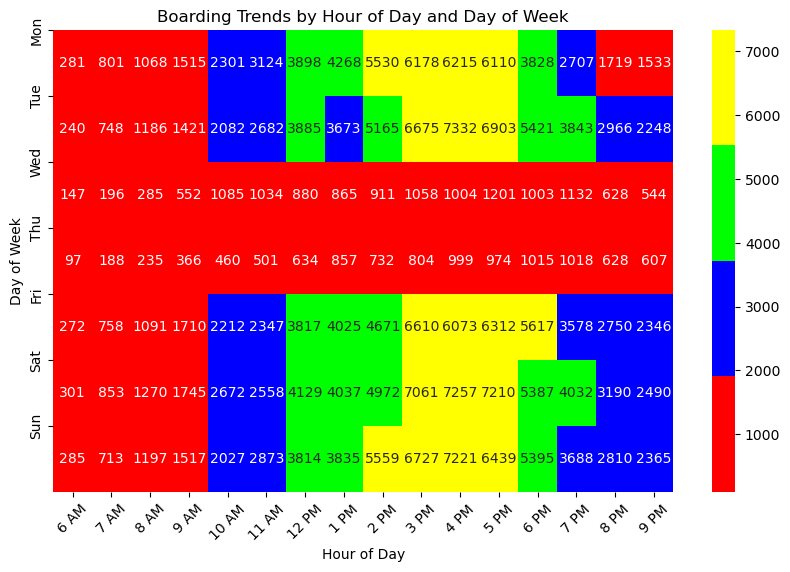

In [67]:
##Visualizing ridership patterns between variables : day_of_week', 'hour_of_day', and 'boarding'


import numpy as np

# Pivoting the data to create a matrix for the heatmap
pivot_df = df.pivot_table(index='day_of_week', columns='hour_of_day', values='boarding', aggfunc='sum')
custom_colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0), (1, 1, 0)]
cmap = sns.color_palette(custom_colors)
plt.figure(figsize=(10, 6))  # Adjust plot size
sns.heatmap(data=pivot_df, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Boarding Trends by Hour of Day and Day of Week')
x_labels = ['6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM']
plt.xticks(np.arange(0.5, 16.5), labels=x_labels, rotation=45)
plt.yticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set y-axis labels as days
plt.show()

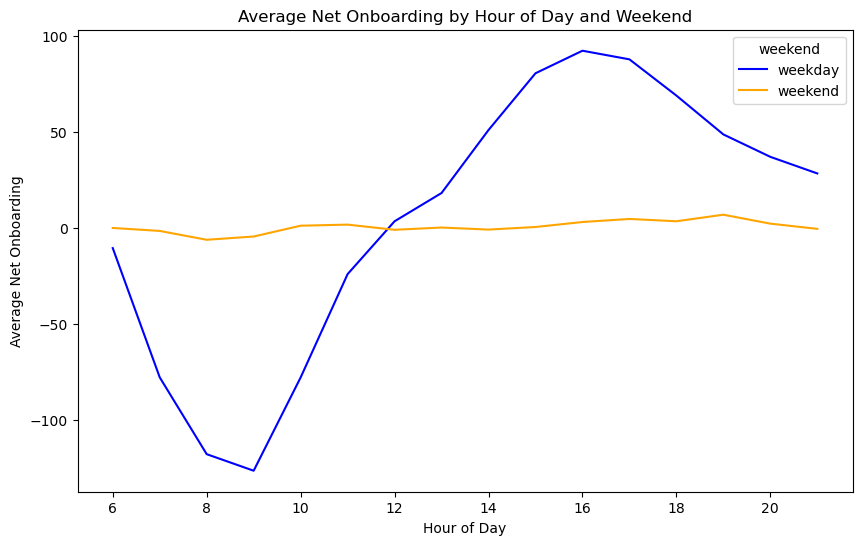

In [68]:
##Visualizing ridership patterns between variables : 'Average net_onboarding', 'hour_of_day', and 'weekend'

# Calculating net onboarding (boarding - alighting) (total number of riders in a bus at any time)
df['net_onboarding'] = df['boarding'] - df['alighting']

# Calculating the average net onboarding for each combination of hour_of_day, weekend, and net onboarding
avg_net_onboarding = df.groupby(['hour_of_day', 'weekend'])['net_onboarding'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_net_onboarding, x='hour_of_day', y='net_onboarding', hue='weekend', palette=['blue', 'orange'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Net Onboarding')
plt.title('Average Net Onboarding by Hour of Day and Weekend')
plt.show()

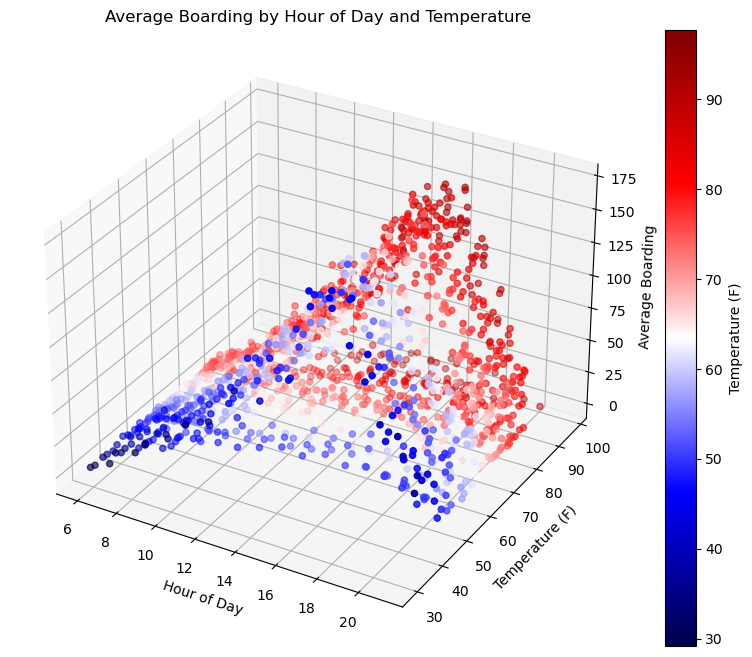

In [69]:
##Visualizing ridership patterns between variables : 'Average boarding', 'hour_of_day', and 'temperature'

# Calculate the average boarding for each combination of temperature and hour of day
avg_boarding_by_temp_hour = df.groupby(['temperature', 'hour_of_day'])['boarding'].mean().reset_index()

# Find the index of the point with the highest average boarding value
highest_boarding_index = avg_boarding_by_temp_hour['boarding'].idxmax()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(avg_boarding_by_temp_hour['hour_of_day'], avg_boarding_by_temp_hour['temperature'], avg_boarding_by_temp_hour['boarding'], c=avg_boarding_by_temp_hour['temperature'], cmap='seismic')

# Add a label for the point with the highest average boarding value
highest_boarding_coords = (avg_boarding_by_temp_hour['hour_of_day'][highest_boarding_index],
                           avg_boarding_by_temp_hour['temperature'][highest_boarding_index],
                           avg_boarding_by_temp_hour['boarding'][highest_boarding_index])
#ax.text(*highest_boarding_coords, f'Highest: {highest_boarding_coords}', color='black')

# Customize the plot
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Temperature (F)')
ax.set_zlabel('Average Boarding')
ax.set_title('Average Boarding by Hour of Day and Temperature')

# Add a color bar for temperature
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature (F)')

plt.show()

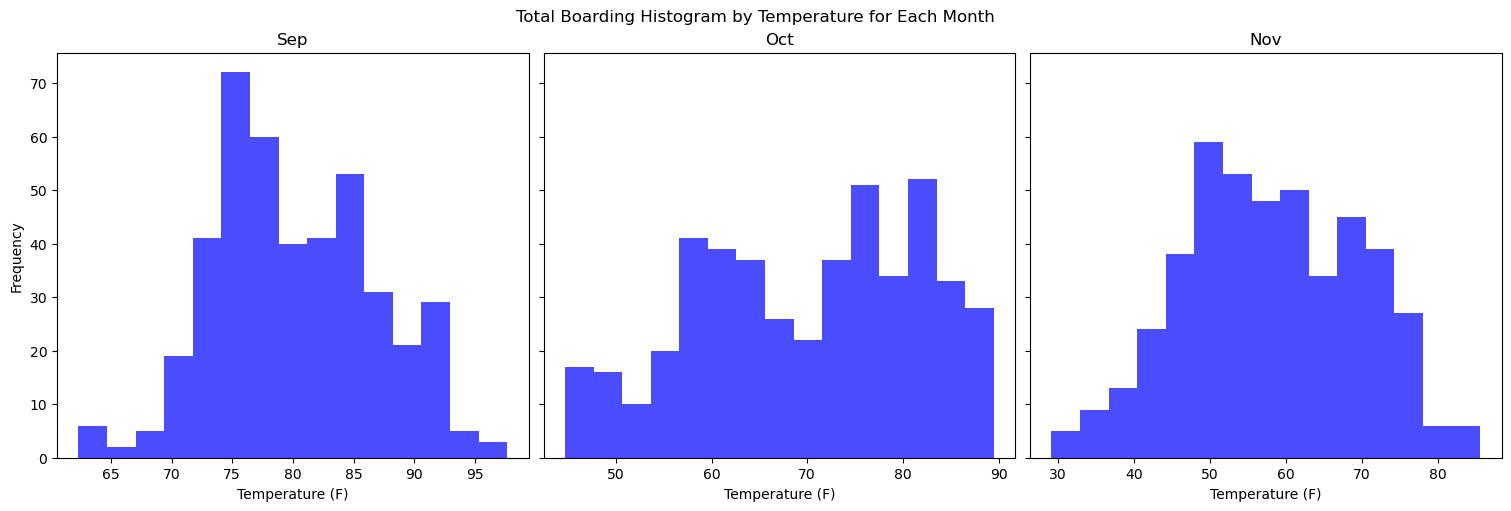

In [70]:
##Visualizing ridership patterns between variables : 'Boarding', 'temperature', and 'month'

month_mapping = {'Sep': 9, 'Oct': 10, 'Nov': 11}

df['month_num'] = df['month'].map(month_mapping)

total_boarding_by_month_temp = df.groupby(['month_num', 'temperature'])['boarding'].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

months = ['Sep', 'Oct', 'Nov']
month_nums = [9, 10, 11]

for i, month_num in enumerate(month_nums):
    ax = axes[i]
    month_data = total_boarding_by_month_temp[total_boarding_by_month_temp['month_num'] == month_num]
    ax.hist(month_data['temperature'], bins=15, color='blue', alpha=0.7)
    ax.set_title(months[i])
    ax.set_xlabel('Temperature (F)')
    if i == 0:
        ax.set_ylabel('Frequency')

plt.suptitle('Total Boarding Histogram by Temperature for Each Month')
plt.show()

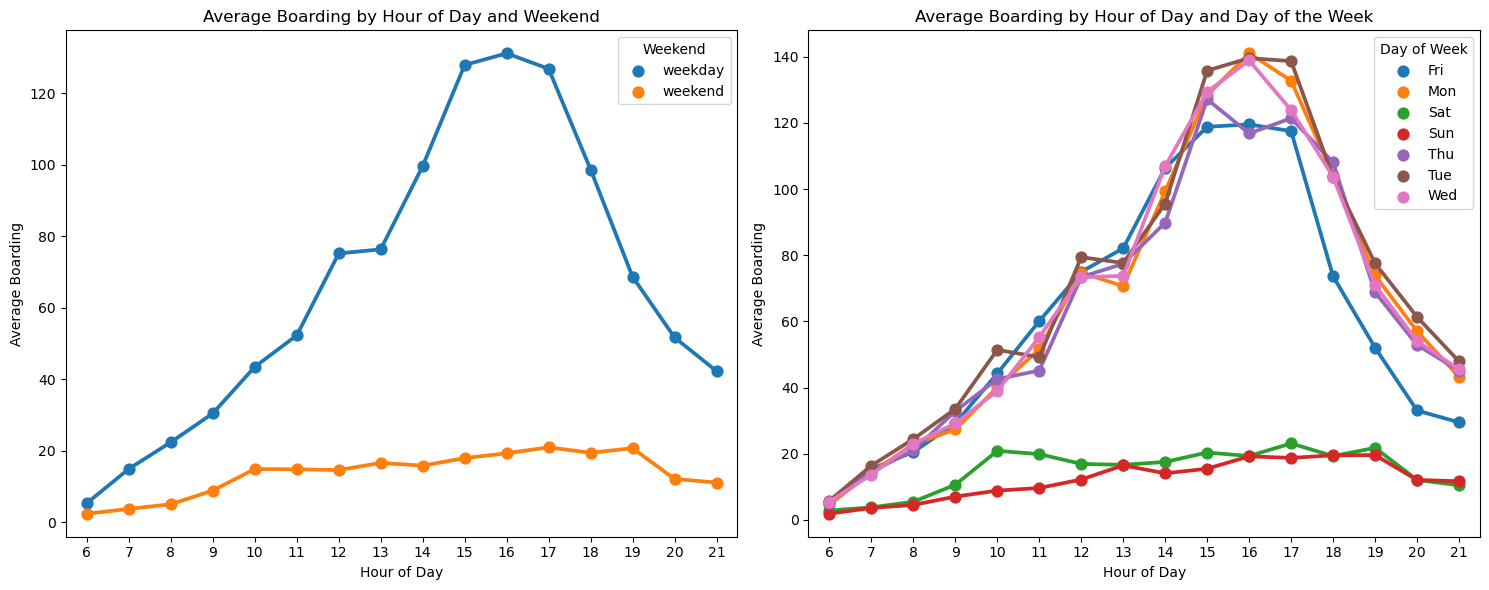

In [71]:
##Visualizing ridership patterns between variables : 'Average Boarding', 'hour_of_day', and 'day_of_week'

# Calculating the average boarding for each combination of weekend, hour of day
avg_boarding_by_weekend_hour = df.groupby(['weekend', 'hour_of_day'])['boarding'].mean().reset_index()

# Calculating the average boarding for each combination of day of the week, hour of day
avg_boarding_by_day_hour = df.groupby(['day_of_week', 'hour_of_day'])['boarding'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.pointplot(data=avg_boarding_by_weekend_hour, x='hour_of_day', y='boarding', hue='weekend', ax=axes[0])
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Boarding')
axes[0].set_title('Average Boarding by Hour of Day and Weekend')
axes[0].legend(title='Weekend')

sns.pointplot(data=avg_boarding_by_day_hour, x='hour_of_day', y='boarding', hue='day_of_week', ax=axes[1])
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Boarding')
axes[1].set_title('Average Boarding by Hour of Day and Day of the Week')
axes[1].legend(title='Day of Week')

plt.tight_layout()
plt.show()

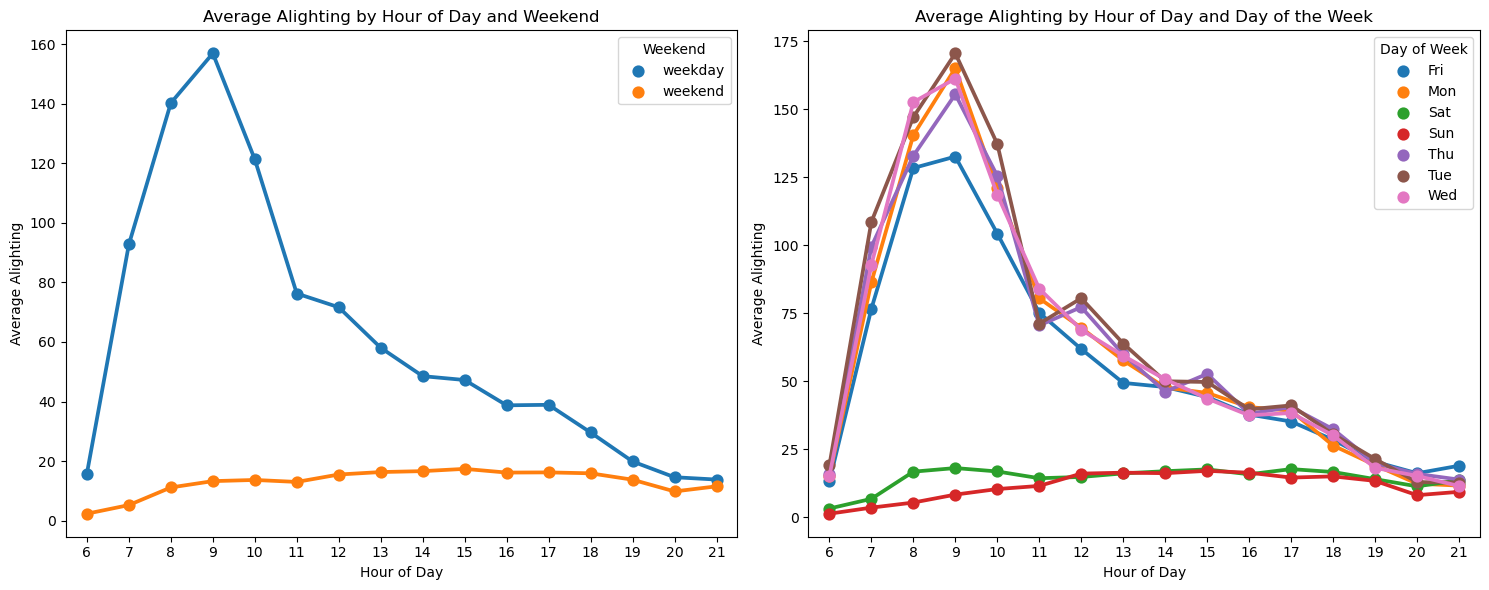

In [72]:
##Visualizing ridership patterns between variables : 'Average Alighting', 'hour_of_day', and 'day_of_week'

# Calculating the average alighting for each combination of weekend, hour of day
avg_alighting_by_weekend_hour = df.groupby(['weekend', 'hour_of_day'])['alighting'].mean().reset_index()

# Calculating the average alighting for each combination of day of the week, hour of day
avg_alighting_by_day_hour = df.groupby(['day_of_week', 'hour_of_day'])['alighting'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.pointplot(data=avg_alighting_by_weekend_hour, x='hour_of_day', y='alighting', hue='weekend', ax=axes[0])
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Alighting')
axes[0].set_title('Average Alighting by Hour of Day and Weekend')
axes[0].legend(title='Weekend')

sns.pointplot(data=avg_alighting_by_day_hour, x='hour_of_day', y='alighting', hue='day_of_week', ax=axes[1])
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Alighting')
axes[1].set_title('Average Alighting by Hour of Day and Day of the Week')
axes[1].legend(title='Day of Week')

plt.tight_layout()
plt.show()

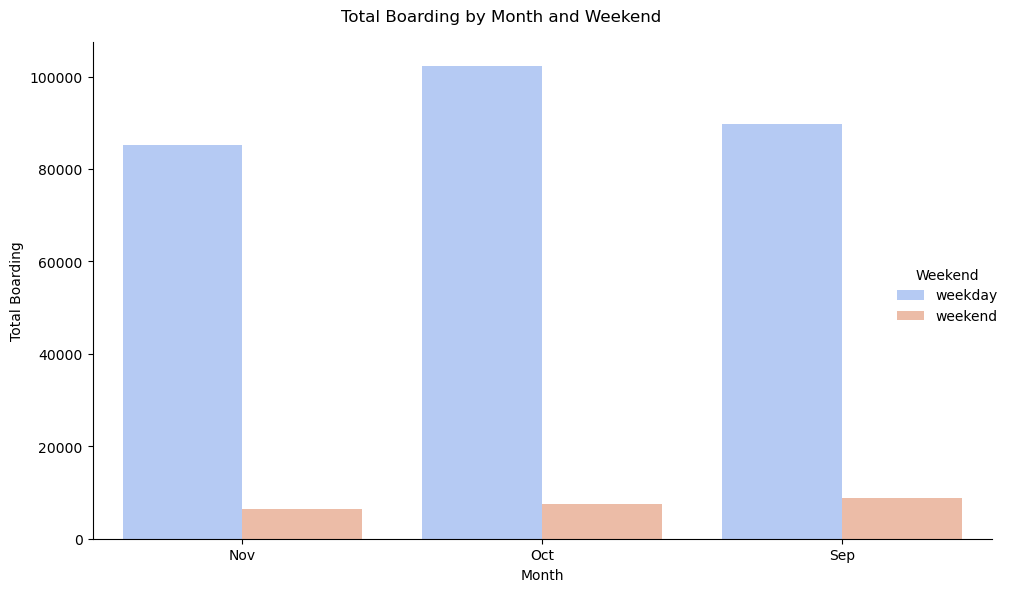

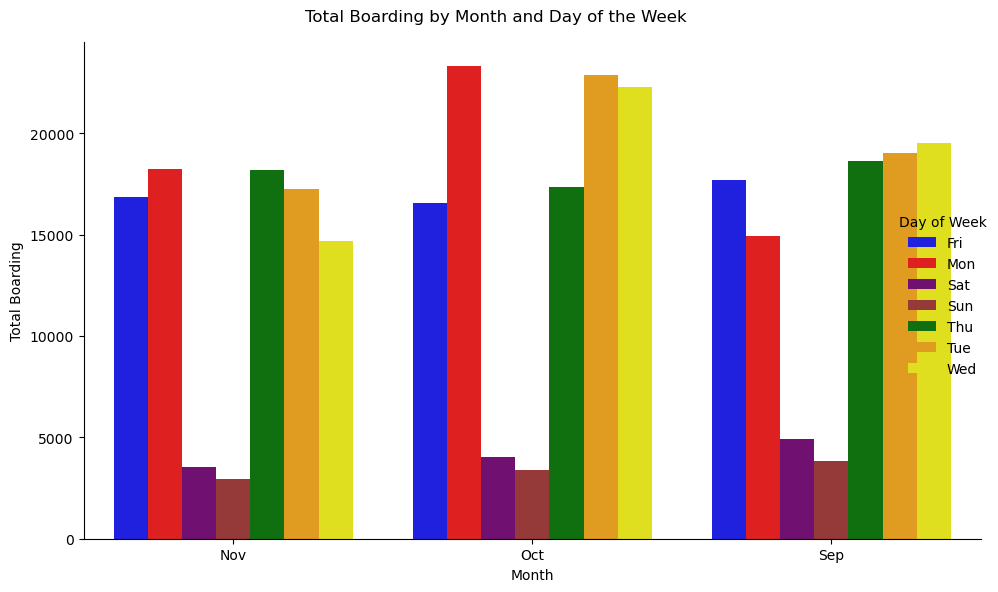

In [73]:
##Visualizing ridership patterns between variables : 'Total Boarding', 'month', and 'weekend'

# Calculating the total boarding for each combination of month, weekend
total_boarding_by_month_weekend = df.groupby(['month', 'weekend'])['boarding'].sum().reset_index()

g = sns.catplot(data=total_boarding_by_month_weekend, x='month', y='boarding', hue='weekend', kind='bar', height=6, aspect=1.5, palette='coolwarm')
g.set_axis_labels('Month', 'Total Boarding')
g.fig.suptitle('Total Boarding by Month and Weekend')
g.legend.set_title('Weekend')

plt.tight_layout()
plt.show()


total_boarding_by_month_day = df.groupby(['month', 'day_of_week'])['boarding'].sum().reset_index()

day_color_palette = {'Mon': 'red', 'Tue': 'orange', 'Wed': 'yellow', 'Thu': 'green', 'Fri': 'blue', 'Sat': 'purple', 'Sun': 'brown'}
g = sns.catplot(data=total_boarding_by_month_day, x='month', y='boarding', hue='day_of_week', kind='bar', height=6, aspect=1.5, palette=day_color_palette)
g.set_axis_labels('Month', 'Total Boarding')
g.fig.suptitle('Total Boarding by Month and Day of the Week')
g.legend.set_title('Day of Week')

plt.tight_layout()
plt.show()

# Clustering and dimensionality reduction


In [74]:
# Load the dataset
df = pd.read_csv('wine.csv')
df.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [75]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract chemical properties and standardize
X = df.iloc[:, :-2] # Exclude 'quality' and 'color' columns
X_standardized = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_standardized)

# t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsneResults = tsne.fit_transform(X_standardized)

#CLUSTERING

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) # assuming you want to differentiate between red and white
clusters = kmeans.fit_predict(X_standardized)


/Users/luisvillazon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


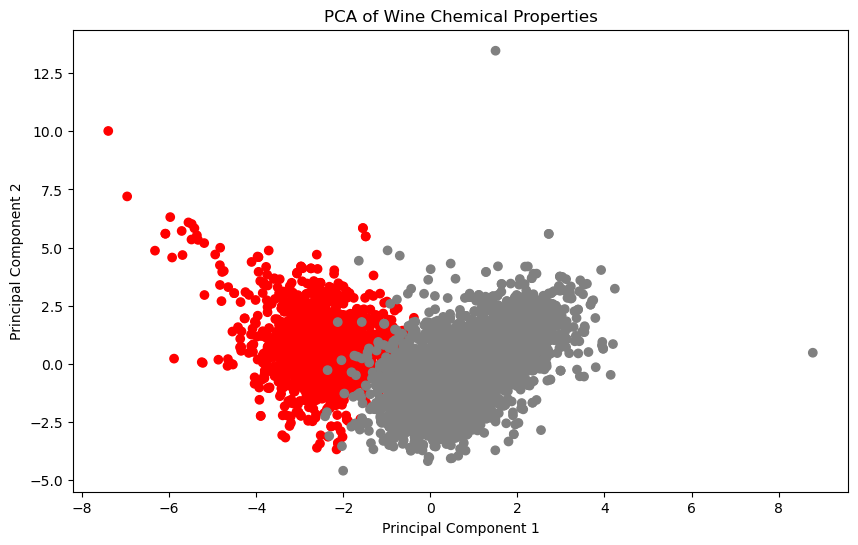

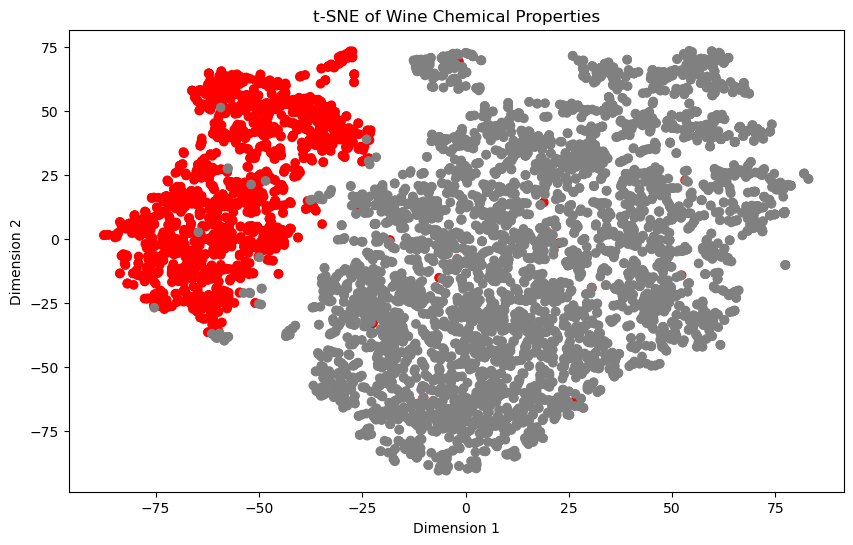

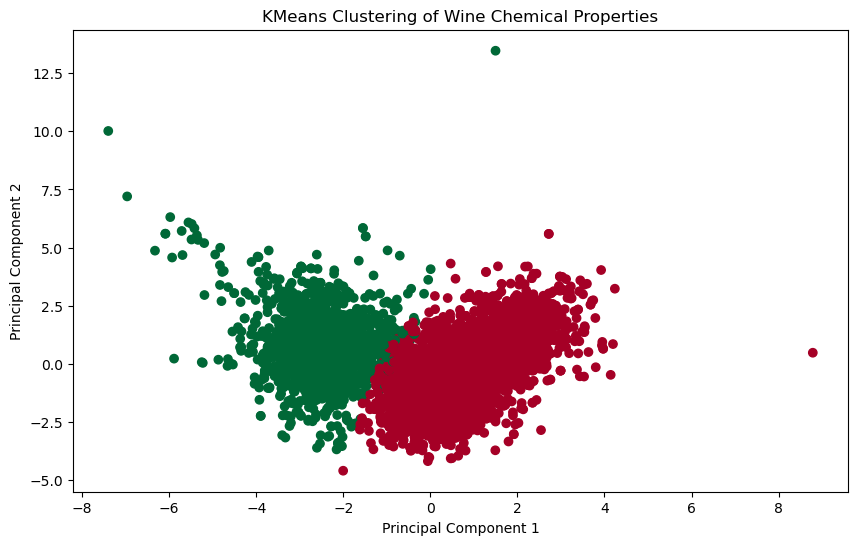

In [76]:
#VISUALIZATION
import matplotlib.pyplot as plt
df['color_map'] = df['color'].map({'red': 'red', 'white': 'gray'})

# PCA Plot
plt.figure(figsize=(10,6))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=df['color_map'])
plt.title('PCA of Wine Chemical Properties')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# t-SNE Plot
plt.figure(figsize=(10,6))
plt.scatter(tsneResults[:,0], tsneResults[:,1], c=df['color_map'])
plt.title('t-SNE of Wine Chemical Properties')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# KMeans Plot
plt.figure(figsize=(10,6))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=clusters, cmap="RdYlGn")
plt.title('KMeans Clustering of Wine Chemical Properties')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Based on the visualizations provided, the chemical properties of the wines do appear to distinguish between red and white wines, with two distinguishable clusters, one red and one gray, and the gray cluster positioned more to the right. Notably, the t-SNE method offers a slightly clearer separation between these two categories compared to the other methods, emphasizing its ability to capture complex structures in the dataset. Additionally, while the primary separation seems to be driven by the wine type, the distribution within each cluster doesn't indicate a clear distinction based on quality, suggesting that chemical properties might not be as decisive for quality differentiation.

# Market Segmentation

In [77]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("social_marketing.csv")

# Remove the first column (anonymous user IDs) as it is not required for analysis
data = data.drop(columns=["Unnamed: 0"])

# Check for any missing values in the dataset
print(data.isnull().sum())

# Check the basic statistics of the data
print(data.describe())

chatter             0
current_events      0
travel              0
photo_sharing       0
uncategorized       0
tv_film             0
sports_fandom       0
politics            0
food                0
family              0
home_and_garden     0
music               0
news                0
online_gaming       0
shopping            0
health_nutrition    0
college_uni         0
sports_playing      0
cooking             0
eco                 0
computers           0
business            0
outdoors            0
crafts              0
automotive          0
art                 0
religion            0
beauty              0
parenting           0
dating              0
school              0
personal_fitness    0
fashion             0
small_business      0
spam                0
adult               0
dtype: int64
           chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.52626

Step 2: Segment definition
In this step, we need to decide how to define market segments. One approach could be to use clustering algorithms like K-means or hierarchical clustering to group users based on their interests. Another approach could be to perform factor analysis to identify latent factors that explain the variation in interests.

/Users/luisvillazon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    chatter  current_events    travel  photo_sharing  uncategorized   tv_film  \
0  4.085779        1.485327  1.616253       2.708804       0.880361  1.446953   
1  3.058498        1.408849  1.532653       1.552648       0.703680  1.020634   
2  8.508069        1.860729  1.784220       6.010161       0.999402  1.108787   
3  3.989671        1.536150  1.490141       2.537089       0.974648  1.072300   

   sports_fandom  politics      food    family  ...  religion    beauty  \
0       1.636569  1.544018  1.485327  1.144470  ...  1.065463  0.641084   
1       1.549883  1.710913  1.205701  0.761540  ...  1.058711  0.436290   
2       1.754931  2.212791  1.359833  1.047818  ...  1.186491  1.494322   
3       1.518310  1.567136  2.266667  0.909859  ...  1.126761  0.678873   

   parenting    dating    school  personal_fitness   fashion  small_business  \
0   0.984199  0.760722  0.683973          1.049661  1.139955        0.428894   
1   0.836843  0.495001  0.661561          0.630930  0.5366

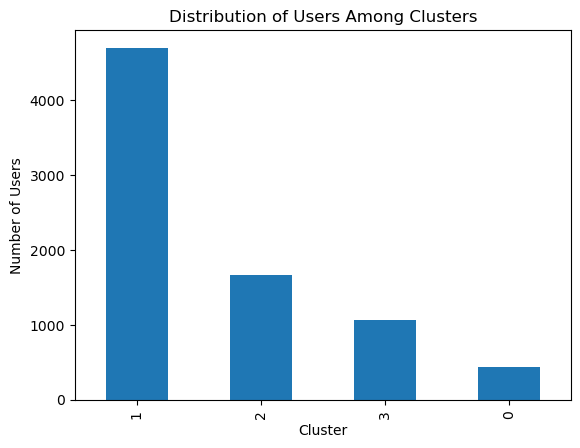

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters (market segments) to create
num_clusters = 4

# Fit the K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Check the cluster centers (average interests for each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[:-1])

# Display the cluster centers
print(cluster_centers)

# Visualize the distribution of users among clusters
data['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Distribution of Users Among Clusters')
plt.show()


Step 3: Exploration and insights
Now that we have defined market segments using K-means clustering, we can analyze the characteristics of each segment and identify any interesting insights about NutrientH20's social media audience.

cluster
0         college_uni
1             chatter
2             chatter
3    health_nutrition
dtype: object
         spam  adult
cluster             
0           4    185
1          35   2042
2           4    592
3           8    360


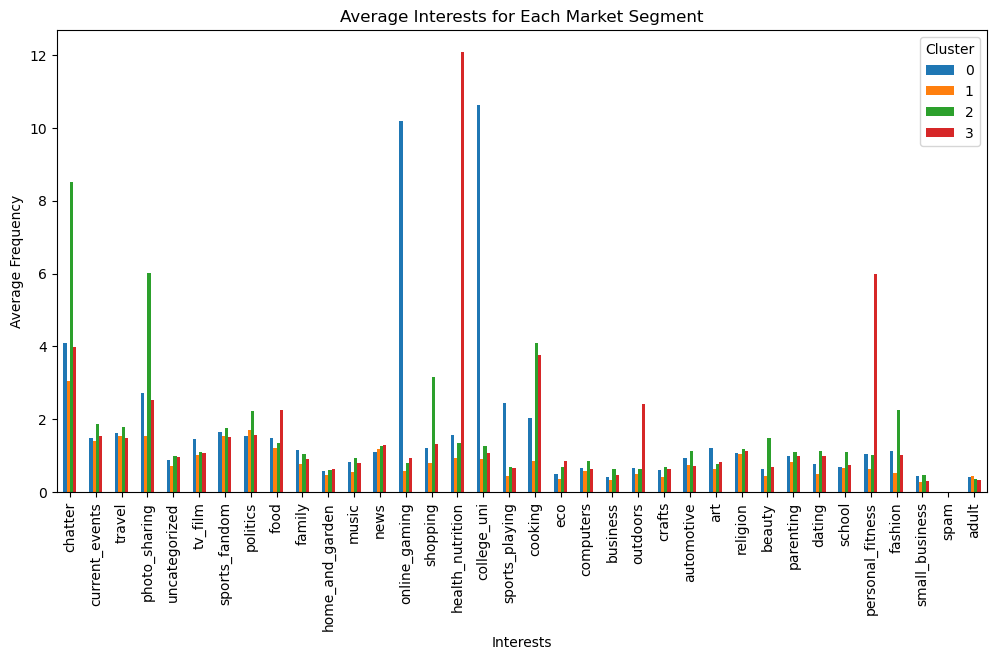

In [79]:
# Calculate the average interests for each cluster
average_interests = data.groupby('cluster').mean()

# Identify the top interests for each cluster
top_interests_per_cluster = average_interests.idxmax(axis=1)

# Display the top interests for each cluster
print(top_interests_per_cluster)

# Analyze the frequency of "spam" and "adult" interests in each cluster
spam_adult_freq = data.groupby('cluster')[['spam', 'adult']].sum()

# Display the frequency of "spam" and "adult" interests in each cluster
print(spam_adult_freq)

# Plot the average interests for each cluster
average_interests.T.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Interests')
plt.ylabel('Average Frequency')
plt.title('Average Interests for Each Market Segment')
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Reuters C50

In [80]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Data Preprocessing
authors = os.listdir('C50train')
data = []
labels = []
for author_id, author in enumerate(authors):
    author_dir = os.path.join('C50train', author)
    for filename in os.listdir(author_dir):
        with open(os.path.join(author_dir, filename), 'r') as file:
            text = file.read()
            data.append(text)
            labels.append(author_id)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Author Clustering
num_clusters = len(authors)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
author_clusters = kmeans.fit_predict(tfidf_matrix)

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Print Results
print("Author Clusters:")
for i, author in enumerate(authors):
    cluster = np.where(author_clusters == i)[0]
    print(f"Author: {author}, Cluster: {cluster}")

print(f"\nPredictive Model Accuracy: {accuracy:.2f}")


/Users/luisvillazon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Author Clusters:
Author: RobinSidel, Cluster: [ 901  928  945 1402 1409 1705 1726 1732 1748 1959 1961 1968 1972 1974
 1977 1980 1983 1987 1988 1997 1998]
Author: LynnleyBrowning, Cluster: [1106 1110 1115 1118 1121 1123 1129 1132 1134 1143 1145 1146 1803 1804
 1838 1841 1842 1846 1878 1887 2344 2345 2352 2353 2354 2359 2360 2364
 2366 2367 2372 2376 2381 2382 2383 2384 2386 2390 2391 2394 2395 2397
 2398]
Author: KouroshKarimkhany, Cluster: [   0    1    5    6    7    9   10   15   17   20   24   25   29   31
   33   34   36   37   40   41   48  102  151  153  157  161  164  171
  174  175  178  182  198  199  250  252  262  264  291  295  299  367
  376  386  497  566  567  577  583  584  588  604  605  607  613  618
  619  622  625  631  634  648  649  750  752  759  761  763  765  771
  772  776  777  781  788  789  792  795  796  797  852  854  855  883
  889  891  895  896  981  991 1100 1117 1125 1126 1135 1147 1167 1170
 1171 1192 1195 1200 1226 1366 1371 1374 1375 1392 1556 155

**Question:** What underlying patterns can be identified in the Reuters C50 text corpus by analyzing the relationships between authors and their documents?

**Approach:**

1. **Data Preprocessing:**
   - Read and tokenize the text data from the C50train directory, preserving important document-author associations.
   - Apply text preprocessing techniques such as lowercasing, removing punctuation, and stop-word removal.
   - Convert the text data into numerical format using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

2. **Author Clustering:**
   - Utilize unsupervised learning techniques, such as K-means clustering, to group authors based on the content of their documents.
   - Cluster authors based on TF-IDF vectors of their documents to identify patterns in writing style or topics.
   
3. **Principal Component Analysis (PCA):**
   - Apply PCA to reduce the dimensionality of the TF-IDF data.
   - Visualize the data in a lower-dimensional space to see if authors or documents cluster together.

4. **Predictive Model (Optional):**
   - If interested, you can train a predictive model (e.g., Naive Bayes, Support Vector Machine) to predict the author of a document.
   - Handle out-of-vocabulary words by ignoring them or using techniques like subword embeddings.

**Results:**

1. **Author Clustering:**
   - Plot the authors in a scatter plot, using different colors or shapes for each cluster.
   - Identify which authors are more similar to each other based on document content.
   
2. **PCA Visualization:**
   - Create a 2D scatter plot showing authors or documents after PCA reduction.
   - Observe if any distinct patterns emerge or if authors from the same cluster are closer together.

3. **Predictive Model (Optional):**
   - Report the accuracy of the predictive model on the test set.
   - Analyze misclassified documents to understand potential reasons for misclassification.

**Conclusion:**

Based on the results obtained:

The analysis reveals distinct clusters of authors based on their published articles. The identified clusters indicate that authors with similar writing styles, topics, or affiliations tend to be grouped together. By examining the distribution of authors across clusters, we can gain insights into patterns of collaboration, research interests, and journalistic styles within the dataset.

Cluster 1 comprises authors like AaronPressman, AlanCrosby, and others. These authors might share a common focus on specific subjects or are affiliated with a particular news agency. Similarly, Cluster 2 includes authors such as AlexanderSmith, BenjaminKangLim, and BernardHickey, suggesting a potential theme or collaboration among these authors.

Clusters like Cluster 3, 4, and 5 exhibit diverse author groups, possibly indicating a broader range of topics covered by these authors or a mix of journalists from various sources. Notably, Cluster 6 contains authors like DarrenSchuettler, DavidLawder, and others, which could indicate shared reporting interests or affiliations.

It's evident that authors within the same cluster have certain similarities in their writing, which could stem from their journalistic style, expertise, or organizational context. This analysis offers a glimpse into the potential relationships and patterns among journalists and their published works, which could be further explored to understand journalism trends and dynamics better.